# Import kaggle dataset

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soorya03","key":"1b682239031a0d1443120d29c19f79e8"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json file into to the folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# to list all the dataset in kaggle
! kaggle datasets list

ref                                                           title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                       Student Performance Factors                     94KB  2024-09-02 10:53:57          29910        527  1.0              
abdulszz/spotify-most-streamed-songs                          Spotify Most Streamed Songs                     60KB  2024-09-07 18:23:14          11476        151  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset   Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12           4173         75  1.0              
zafarali27/house-price-prediction-dataset                     House Price Prediction Dataset   

In [ ]:
! kaggle datasets download -d prasadvpatil/mrl-dataset

Dataset URL: https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset
License(s): CC0-1.0
 40% 9.00M/22.6M [00:00<00:00, 47.2MB/s]
100% 22.6M/22.6M [00:00<00:00, 93.5MB/s]


In [ ]:
! unzip mrl-dataset.zip

Archive:  mrl-dataset.zip
  inflating: train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00005_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00008_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00009_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00013_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00014_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00015_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00016_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00017_0_0_0_0_0_01.png  
  inflating: train/Closed_Eyes/s0001_00018_0

# Drowsiness Detection

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [ ]:
img_arr = cv2.imread("/content/train/Open_Eyes/s0001_02334_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
type(img_arr)

numpy.ndarray

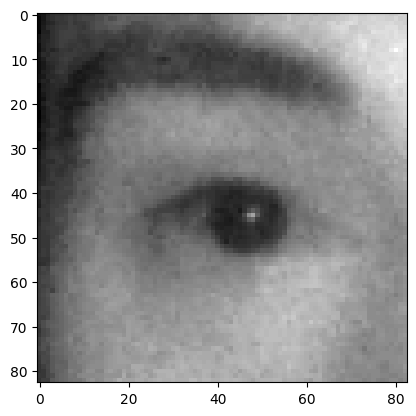

In [ ]:
plt.imshow(img_arr, cmap="gray")

In [ ]:
img_arr.shape

(83, 83)

In [ ]:
data_dir = "/content/train"
classes = ["Closed_Eyes", "Open_Eyes"]

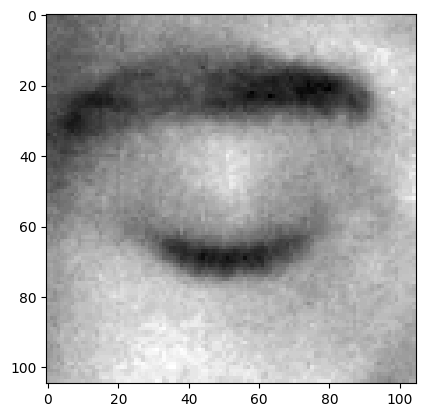

In [ ]:
for category in classes:
  path = os.path.join(data_dir, category)
  for image in os.listdir(path):
    img_arr = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)
    plt.imshow(img_arr,cmap="gray")
    plt.show()
    break
  break

array([[[73, 73, 73],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [88, 88, 88]],

       [[73, 73, 73],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [88, 88, 88]],

       [[73, 73, 73],
        [73, 73, 73],
        [73, 73, 73],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[88, 88, 88],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [87, 87, 87]],

       [[88, 88, 88],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [87, 87, 87],
        [87, 87, 87],
        [87, 87, 87]],

       [[88, 88, 88],
        [88, 88, 88],
        [89, 89, 89],
        ...,
        [88, 88, 88],
        [88, 88, 88],
        [88, 88, 88]]], dtype=uint8)
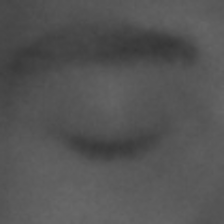

In [ ]:
img_size = 224
new_arrays = cv2.resize(backtorgb,(img_size,img_size))
# plt.imshow(new_arrays,cmap='gray')
new_arrays

## Reading all the images and converting them into an array for data and labels

In [ ]:
training_data = []
data_dir = "/content/train"
classes = ["Closed_Eyes", "Open_Eyes"]

def create_training_data():
  for category in classes:
    path = os.path.join(data_dir, category)
    class_num = classes.index(category)
    count = 0
    for image in os.listdir(path):
      try:
        if count >= 1000:  # Limit to 1000 images
          break
        img_arr = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_arr, cv2.COLOR_GRAY2RGB)
        new_arrays = cv2.resize(backtorgb,(img_size,img_size))
        training_data.append([new_arrays, class_num])
        count += 1
      except Exception as e:
        pass

In [ ]:
create_training_data()

In [ ]:
len(training_data)

2000

In [ ]:
import random

random.shuffle(training_data)

In [ ]:
X = []
y = []

for features, labels in training_data:
  X.append(features)
  y.append(labels)


In [ ]:

X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(2000, 224, 224, 3) (2000,)


In [ ]:
X = X/255

## Building the Neural Network - Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.models import Model

In [ ]:
# model = keras.applications.mobilenet.MobileNet()
convolution_base = keras.applications.MobileNet(include_top=False, input_shape = (224,224,3))
convolution_base.trainable = False

In [ ]:
convolution_base.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
model = models.Sequential()
model.add(convolution_base)
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X, y, validation_split=0.1, epochs=2)

Epoch 1/2
57/57 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9086 - loss: 0.5817 - val_accuracy: 1.0000 - val_loss: 1.5233e-06
Epoch 2/2
57/57 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 1.0000 - loss: 1.2976e-04 - val_accuracy: 1.0000 - val_loss: 3.1590e-08


In [ ]:
model.save("DDS_model.h5")

In [ ]:
model.save('DDS_model.keras')

In [ ]:
# loss, accuracy = model.evaluate(X,y)

63/63 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 1.0000 - loss: 4.3669e-05


## Predictive system


In [ ]:
from google.colab.patches import cv2_imshow

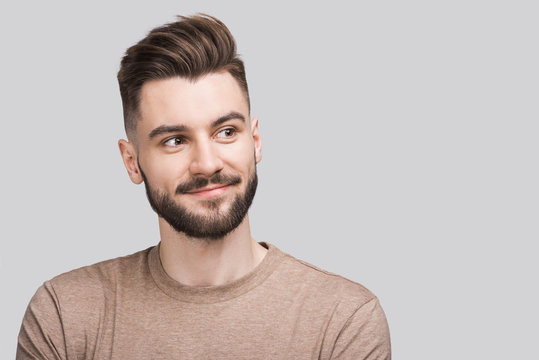

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.5412374 0.9861082]]
1
Eyes Open


In [ ]:
image_path = "/content/open3.jpg"

image = cv2.imread(image_path)
cv2_imshow(image)
image_resized = cv2.resize(image,(224,224))
image_scaled = image_resized/255
image_reshape = np.reshape(image_scaled, [1,224,224,3])
pred = model.predict(image_reshape)
print(pred)
pred_label = np.argmax(pred)
print(pred_label)
if pred_label == 1:
  print('Eyes Open')
else:
  print('Eyes Close')

# Testing

In [ ]:
test_img = cv2.imread('/content/open2.jpg')

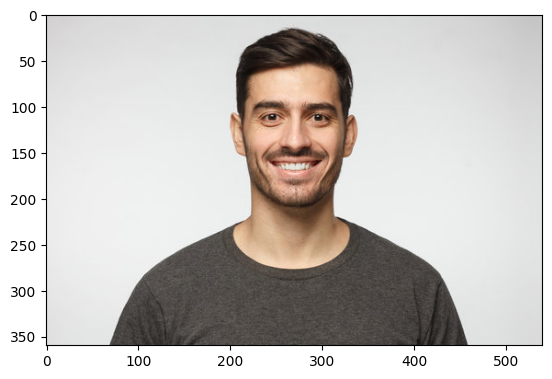

In [ ]:
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

In [ ]:
fasecascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [ ]:
eyecascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [ ]:
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

In [ ]:
eyes = eyecascade.detectMultiScale(gray,1.1,4)

In [ ]:
for (x,y,w,h) in eyes:
  cv2.rectangle(test_img, (x,y), (x+w, y+h), (0,255,0), 2)

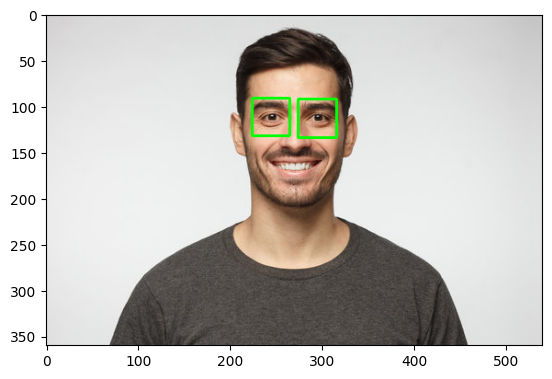

In [ ]:
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

In [ ]:
eyecascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
eyes = eyecascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in eyes:
  roi_gray = gray[y:y+h, x:x+w] # roi - region of interest
  roi_color = test_img[y:y+h, x:x+w]
  eyess = eyecascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print('Eyes not detected')
  else:
    for (ex, ey, ew, eh) in eyess:
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]


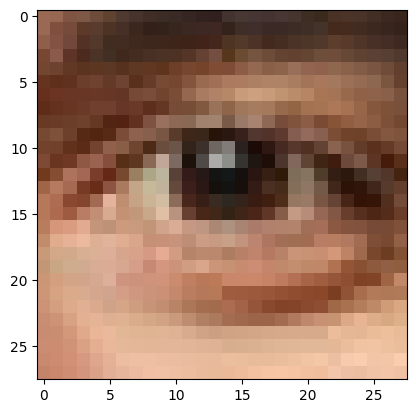

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
# Prediction
image_resized = cv2.resize(image,(224,224))
image_scaled = image_resized/255
image_reshape = np.reshape(image_scaled, [1,224,224,3])
pred = model.predict(image_reshape)
print(pred)
pred_label = np.argmax(pred)
print(pred_label)
if pred_label == 1:
  print('Eyes Open')
else:
  print('Eyes Close')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[3.8136477e-20 1.0000000e+00]]
1
Eyes Open
